In [1]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("flickr_dataset_dbscan.csv")
#data = pd.read_csv(r'\home\ashish\Desktop\Major_Project\flickr_dataset.csv')

In [3]:
complete_data = data[["Photo ID", "User ID", "Latitude", "Longitude", "Timestamp", "Tags"]]

data_frame = pd.DataFrame(complete_data)
data_frame.columns = [c.replace(' ', '_') for c in data_frame.columns]
print data_frame

         Photo_ID          User_ID   Latitude  Longitude            Timestamp  \
0     30654573795      7771707@N08  19.128161  72.824935  2015-09-27 16:41:07   
1      5706865168      8930636@N05  18.983895  72.818756  2011-02-22 08:47:25   
2      7871161542  49503155635@N01  18.954864  72.811491  2012-08-22 19:35:42   
3      9646208523     28134801@N00  18.929020  72.829055  2011-05-19 11:44:22   
4      9669245285     85362192@N05  19.076190  72.875877  2013-08-17 21:26:44   
5      9740620019     43137341@N03  19.076190  72.875877  2005-06-12 08:42:11   
6      9835256683     70933940@N04  19.053520  72.833297  2013-09-20 12:28:01   
7     10136783754     36524915@N05  19.102350  72.881927  2012-03-10 12:25:29   
8     10172940496     68176223@N07  19.076190  72.875877  2012-12-27 06:37:32   
9     10476346393     49772967@N00  18.942660  72.816009  2013-12-01 09:33:15   
10    10555824203     68176223@N07  19.076190  72.875877  2012-12-26 08:34:02   
11    10595179136      99395

In [4]:
data = data[["Latitude", "Longitude"]]
print data

       Latitude  Longitude
0     19.128161  72.824935
1     18.983895  72.818756
2     18.954864  72.811491
3     18.929020  72.829055
4     19.076190  72.875877
5     19.076190  72.875877
6     19.053520  72.833297
7     19.102350  72.881927
8     19.076190  72.875877
9     18.942660  72.816009
10    19.076190  72.875877
11    18.941280  72.899265
12    18.917897  72.822500
13    18.924572  72.831463
14    18.924572  72.831463
15    18.929711  72.828969
16    18.924572  72.831463
17    18.933932  72.827425
18    19.076190  72.875877
19    19.076190  72.875877
20    19.076190  72.875877
21    18.966834  72.844344
22    18.921226  72.826309
23    19.015783  72.858485
24    19.043336  72.824764
25    19.086580  72.833164
26    18.913431  72.824592
27    18.904987  72.811374
28    18.904987  72.811374
29    18.904987  72.811374
...         ...        ...
1487  19.033884  72.824935
1488  19.033884  72.824935
1489  19.033884  72.824935
1490  19.033884  72.824935
1491  19.033884  72.824935
1

In [5]:
data = data.as_matrix().astype("float32", copy = False)
print data

[[ 19.12816048  72.82493591]
 [ 18.98389435  72.8187561 ]
 [ 18.9548645   72.81149292]
 ..., 
 [ 19.03388405  72.82493591]
 [ 19.03388405  72.82493591]
 [ 19.03388405  72.82493591]]


In [6]:
print np.std(data[0:, 0])   #Standard deviation along the latitude
print np.std(data[0:, 1])   #Standard deviation along the longitude

0.405598
0.248764


In [7]:
stscaler = StandardScaler().fit(data)
data = stscaler.transform(data)
print data

[[ 0.40322098 -0.00846469]
 [ 0.04753347 -0.0333067 ]
 [-0.02403949 -0.06250373]
 ..., 
 [ 0.17078286 -0.00846469]
 [ 0.17078286 -0.00846469]
 [ 0.17078286 -0.00846469]]


In [8]:
start_time = time.time()
dbsc = DBSCAN(eps = .001, min_samples = 10).fit(data)

#print("--- %s seconds ---" % (time.time() - start_time))
# for x in dbsc.labels_:
#     print x
data_frame['Cluster'] = dbsc.labels_
print data_frame

         Photo_ID          User_ID   Latitude  Longitude            Timestamp  \
0     30654573795      7771707@N08  19.128161  72.824935  2015-09-27 16:41:07   
1      5706865168      8930636@N05  18.983895  72.818756  2011-02-22 08:47:25   
2      7871161542  49503155635@N01  18.954864  72.811491  2012-08-22 19:35:42   
3      9646208523     28134801@N00  18.929020  72.829055  2011-05-19 11:44:22   
4      9669245285     85362192@N05  19.076190  72.875877  2013-08-17 21:26:44   
5      9740620019     43137341@N03  19.076190  72.875877  2005-06-12 08:42:11   
6      9835256683     70933940@N04  19.053520  72.833297  2013-09-20 12:28:01   
7     10136783754     36524915@N05  19.102350  72.881927  2012-03-10 12:25:29   
8     10172940496     68176223@N07  19.076190  72.875877  2012-12-27 06:37:32   
9     10476346393     49772967@N00  18.942660  72.816009  2013-12-01 09:33:15   
10    10555824203     68176223@N07  19.076190  72.875877  2012-12-26 08:34:02   
11    10595179136      99395

In [9]:
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

n_clusters = len(set(labels))

print n_clusters, set(labels)

34 set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, -1])


In [10]:
by_cluster = data_frame.groupby("Cluster")
cen_lat = by_cluster.mean()['Latitude']
cen_lon = by_cluster.mean()['Longitude']

print cen_lat, cen_lon

Cluster
-1     18.884269
 0     19.076190
 1     18.924572
 2     18.904987
 3     18.954187
 4     18.922178
 5     18.947502
 6     18.958536
 7     18.978733
 8     18.939864
 9     18.996156
 10    19.024471
 11    19.000208
 12    19.043296
 13    18.983602
 14    18.994608
 15    18.943179
 16    18.921935
 17    18.924265
 18    18.945983
 19    18.929305
 20    18.995126
 21    18.934866
 22    18.963766
 23    18.956107
 24    19.044671
 25    18.982075
 26    19.043297
 27    19.210184
 28    18.938763
 29    18.930320
 30    18.960032
 31    19.213912
 32    19.033884
Name: Latitude, dtype: float64 Cluster
-1     72.824505
 0     72.875877
 1     72.831463
 2     72.811374
 3     72.798094
 4     72.834453
 5     72.834488
 6     72.842733
 7     72.809966
 8     72.834771
 9     72.835861
 10    72.853088
 11    72.849655
 12    72.846908
 13    72.819598
 14    72.836608
 15    72.823974
 16    72.833556
 17    72.832009
 18    72.825965
 19    72.831845
 20    72.826083
 

In [11]:
total_len = 0
for x in set(labels):
    print "Data of Cluster ", x
    data_cluster = data[labels == x]
    total_len = total_len + len(data_cluster)
    print len(data_cluster)

print total_len

Data of Cluster  0
27
Data of Cluster  1
24
Data of Cluster  2
35
Data of Cluster  3
30
Data of Cluster  4
40
Data of Cluster  5
10
Data of Cluster  6
10
Data of Cluster  7
24
Data of Cluster  8
20
Data of Cluster  9
10
Data of Cluster  10
12
Data of Cluster  11
10
Data of Cluster  12
12
Data of Cluster  13
12
Data of Cluster  14
70
Data of Cluster  15
30
Data of Cluster  16
19
Data of Cluster  17
24
Data of Cluster  18
40
Data of Cluster  19
26
Data of Cluster  20
10
Data of Cluster  21
26
Data of Cluster  22
24
Data of Cluster  23
10
Data of Cluster  24
20
Data of Cluster  25
24
Data of Cluster  26
14
Data of Cluster  27
162
Data of Cluster  28
41
Data of Cluster  29
26
Data of Cluster  30
28
Data of Cluster  31
14
Data of Cluster  32
60
Data of Cluster  -1
573
1517


/home/ashish/.local/lib/python2.7/site-packages/matplotlib/lines.py:1145: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


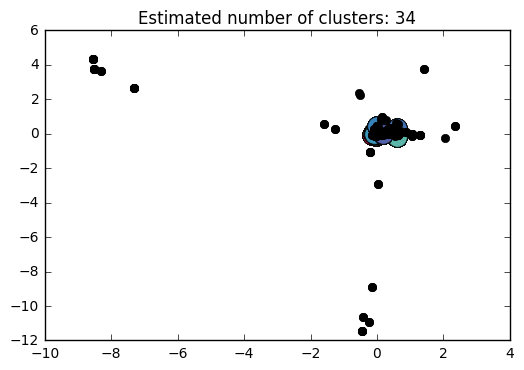

In [12]:
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = data[class_member_mask & core_samples]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)

    xy = data[class_member_mask & ~core_samples]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters)
plt.show()

In [13]:
index = 0
all_users_all_trips_list = [ [] for x in xrange(len(set(labels)) - 1) ]  #creates list of lists

#while index < 4:   #not considering noise point
while index < (len(set(labels)) - 1):   #not considering noise point
    indiv_cluster_data = data_frame[data_frame.Cluster==index]
    #print indiv_cluster_data
    unique_user_list = indiv_cluster_data.User_ID.unique()
    
    for user in unique_user_list:
        sorted_user_photos = indiv_cluster_data[indiv_cluster_data.User_ID==user].sort_values(by='Timestamp', ascending=False)
        #print "Sorted User Photos"
        #print sorted_user_photos
        
        #single_user_all_trips_list = pd.DataFrame()
        single_user_all_trips_list = []          #list of all visits by a user to a location cluster
        visit = pd.DataFrame(columns = ["Photo_ID", "User_ID", "Latitude", "Longitude", "Timestamp", "Tags"])
        photo_index = 0
        
        visit = visit.append(sorted_user_photos.iloc[photo_index])  #add first photo to visit
        #print visit
        
        while photo_index < (len(sorted_user_photos) - 1):
            ts_diff = pd.to_datetime(sorted_user_photos.iloc[photo_index].Timestamp) - pd.to_datetime(sorted_user_photos.iloc[photo_index+1].Timestamp)
            #print ts_diff.seconds / 60   #get time difference in minutes
            
            if (ts_diff.seconds / 60) <= 60:
                visit = visit.append(sorted_user_photos.iloc[photo_index+1])
                if (photo_index + 1) == (len(sorted_user_photos) - 1):
                    #basically if the loop breaks in next iteration
                    #single_user_all_trips_list = single_user_all_trips_list.append(visit)
                    single_user_all_trips_list.append(visit)
                    median_timestamp = visit.iloc[(len(visit)/2)].Timestamp
                    #print median_timestamp
            else:
                #print visit.describe()
                #print len(visit)
                median_timestamp = visit.iloc[(len(visit)/2)].Timestamp
                print median_timestamp
                #single_user_all_trips_list = single_user_all_trips_list.append(visit) 
                single_user_all_trips_list.append(visit) 
                
                visit = pd.DataFrame(columns = ["Photo_ID", "User_ID", "Latitude", "Longitude", "Timestamp", "Tags"])
                #print visit
                visit = visit.append(sorted_user_photos.iloc[photo_index+1])  #add the next photo as ts diff > 60
                
                if (photo_index + 1) == (len(sorted_user_photos) - 1):
                    #basically if the loop breaks in next iteration
                    #single_user_all_trips_list = single_user_all_trips_list.append(visit)
                    single_user_all_trips_list.append(visit)
                    median_timestamp = visit.iloc[(len(visit)/2)].Timestamp
                    #print median_timestamp
                
            
            photo_index += 1
        
        if len(sorted_user_photos) == 1:    #if there is only one photo for a user
            #single_user_all_trips_list = single_user_all_trips_list.append(visit)
            single_user_all_trips_list.append(visit)
            median_timestamp = visit.iloc[(len(visit)/2)].Timestamp
            #print median_timestamp
        
        print "Single User All Trips List"
        print single_user_all_trips_list    # trips made by a single user for one location cluster
        
        all_users_all_trips_list[index].append(single_user_all_trips_list)
    
    print "All Users All Trips"
    print all_users_all_trips_list[index]
        
    index += 1

Single User All Trips List
[          Photo_ID       User_ID  Latitude  Longitude            Timestamp  \
4     9.669245e+09  85362192@N05  19.07619  72.875877  2013-08-17 21:26:44   
1172  9.669245e+09  85362192@N05  19.07619  72.875877  2013-08-17 21:26:44   

                                                   Tags  Cluster  
4     bottles, streets, mumbai, india, canon550d, co...      0.0  
1172  bottles, streets, mumbai, india, canon550d, co...      0.0  ]
Single User All Trips List
[          Photo_ID       User_ID  Latitude  Longitude            Timestamp  \
5     9.740620e+09  43137341@N03  19.07619  72.875877  2005-06-12 08:42:11   
1171  9.740620e+09  43137341@N03  19.07619  72.875877  2005-06-12 08:42:11   

                       Tags  Cluster  
5     mumbai, india, travel      0.0  
1171  mumbai, india, travel      0.0  ]
2012-12-27 06:17:22
2012-12-27 01:51:14
Single User All Trips List
[          Photo_ID       User_ID  Latitude  Longitude            Timestamp  \
8     1.